# Importing Libraries

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# reading and processing data

In [133]:
df = pd.read_csv('//Users//amritanshuraj//Desktop//insurance.csv')

In [134]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [135]:
# checking if any null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualisation

Text(0.5, 1.0, 'region vs charges')

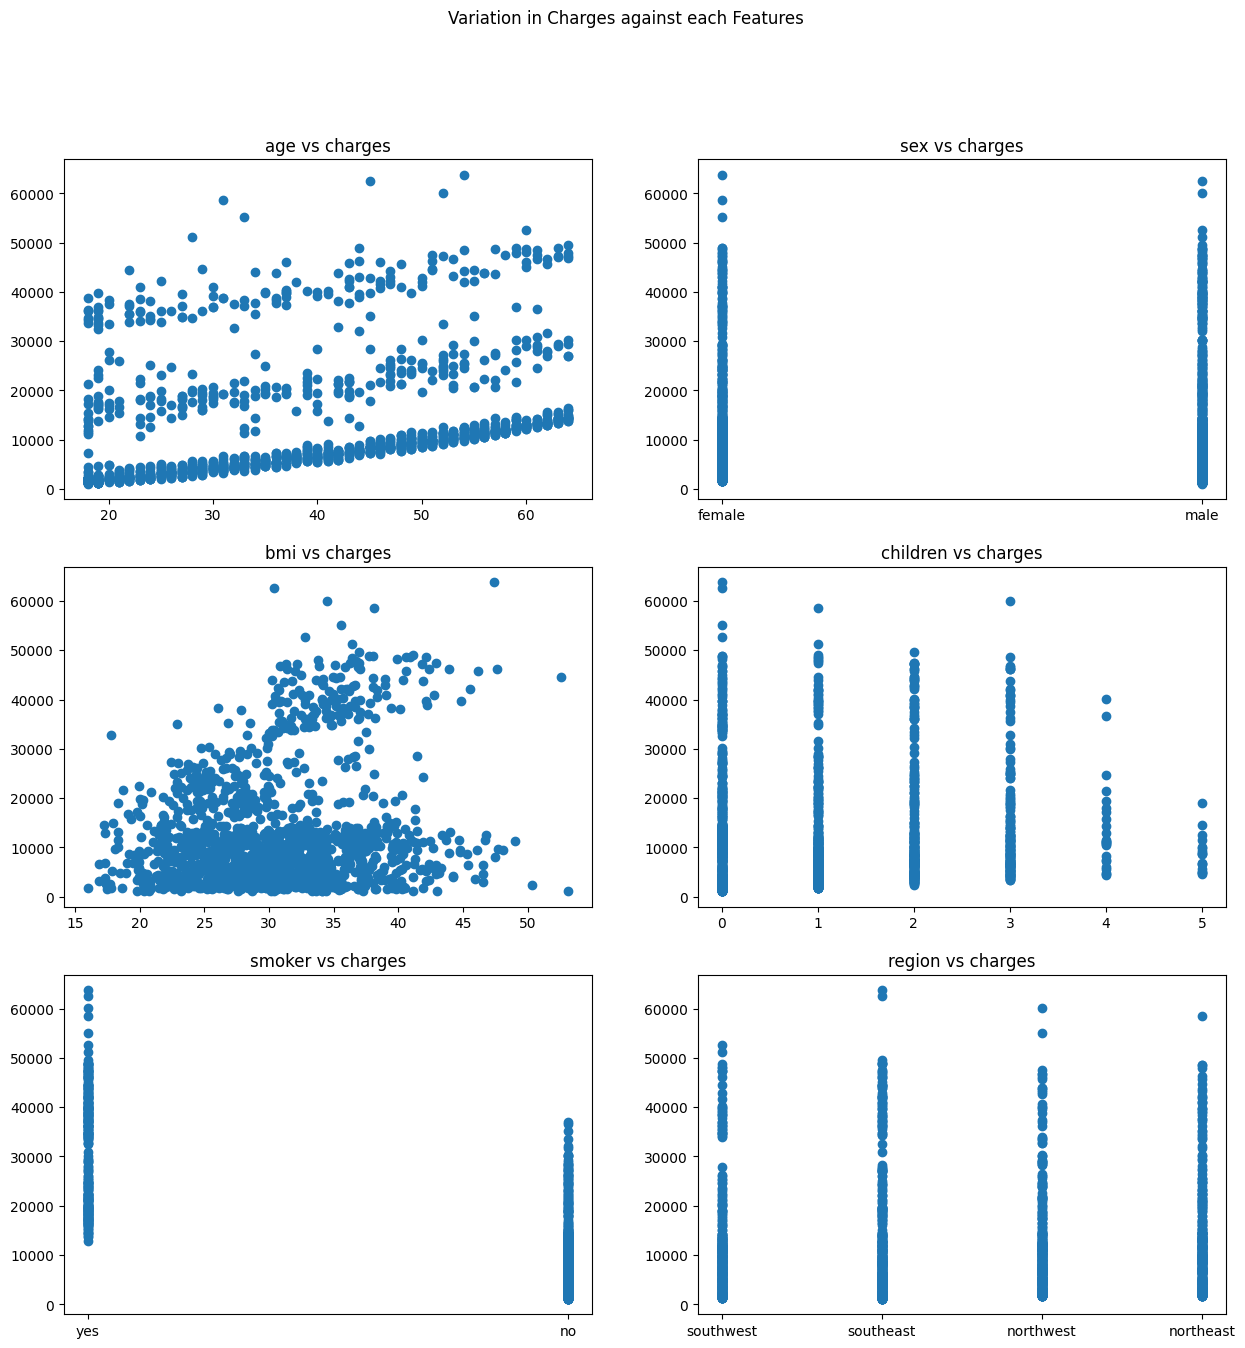

In [136]:
# Plotting Charges against each features using different subplots to see each variations
fig,axes=plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Variation in Charges against each Features")
axes[0,0].scatter(df["age"],df["charges"])
axes[0,0].set_title("age vs charges")
axes[0,1].scatter(df["sex"],df["charges"])
axes[0,1].set_title("sex vs charges")
axes[1,0].scatter(df["bmi"],df["charges"])
axes[1,0].set_title("bmi vs charges")
axes[1,1].scatter(df["children"],df["charges"])
axes[1,1].set_title("children vs charges")
axes[2,0].scatter(df["smoker"],df["charges"])
axes[2,0].set_title("smoker vs charges")
axes[2,1].scatter(df["region"],df["charges"])
axes[2,1].set_title("region vs charges")

In [137]:
#  deriving the mean of charges with respect to each features and all the categories
print("="*50)
print("average charges for the smokers:-")
print("average charges for smokers",df[df["smoker"]=="yes"]["charges"].mean())
print("average charges for non-smokers",df[df["smoker"]=="no"]["charges"].mean())
print("="*50)
print("average charges for different age group:-")
for age_range in [(0,18),(18,35),(35,50),(50,100)]:
    lower_bound,upper_bound=age_range
    print("average charges for age_range:-",age_range,":",df[(df["age"]>=lower_bound)&(df["age"]<=upper_bound)]["charges"].mean())
print("="*50)
print("average charges for bmi group:-")
for bmi_range in [(0,18.5),(18.5,24.5),(24.5,29.5),(29.5,34.5),(34.5,100)]:
    lower_bound,upper_bound=bmi_range
    print("average charges for bmi_range:-",bmi_range,":",df[(df["bmi"]>=lower_bound)&(df["bmi"]<=upper_bound)]["charges"].mean())
print("="*50)
print("average charges for differetn regions:-")
for region in df["region"].unique():
    print("average charges for regions:-",region,":",df[df["region"]==region]["charges"].mean())
print("="*50)
print("average charges for gender:-")
for gender in df["sex"].unique():
    print("average charges for gender:-",gender,":",df[df["sex"]==gender]["charges"].mean())

average charges for the smokers:-
average charges for smokers 32050.23183153284
average charges for non-smokers 8434.268297856204
average charges for different age group:-
average charges for age_range:- (0, 18) : 7086.217556362319
average charges for age_range:- (18, 35) : 9744.478281339721
average charges for age_range:- (35, 50) : 13872.791123972285
average charges for age_range:- (50, 100) : 17902.552070363636
average charges for bmi group:-
average charges for bmi_range:- (0, 18.5) : 8657.620652380954
average charges for bmi_range:- (18.5, 24.5) : 10075.62266459596
average charges for bmi_range:- (24.5, 29.5) : 11007.703540161203
average charges for bmi_range:- (29.5, 34.5) : 14001.17527626506
average charges for bmi_range:- (34.5, 100) : 16905.08859565982
average charges for differetn regions:-
average charges for regions:- southwest : 12346.937377292308
average charges for regions:- southeast : 14735.411437609888
average charges for regions:- northwest : 12417.57537396923
averag

# Outlier removal

In [138]:
# to remove the outliers we are going to use standard deviation approach.
# for above approach we are going to calculate the Z score of data points given by |(Xi - Mean(x))|/ std(x)>3 = Outliers 
# "||"means absolute value

In [139]:
df=df[(np.abs(df["charges"]-df["charges"].mean())/df["charges"].std()<3)]
df=df[(np.abs(df["age"]-df["age"].mean())/df["age"].std()<3)]
df=df[(np.abs(df["bmi"]-df["bmi"].mean())/df["bmi"].std()<3)]
df=df[(np.abs(df["children"]-df["children"].mean())/df["children"].std()<3)]


In [140]:
print("total numbers of samples after outliers removal:",len(df))

total numbers of samples after outliers removal: 1309


In [141]:
# further cleaning of data
# since region and sex has no impact on the variations of the charges hence, we will drop this column
df=df.drop(columns=["sex","region"])

In [142]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


In [143]:
# since, ML model never takes categorical data. Hence, convert the categorical data into numerical data. 
# smoker column we are going to replace YES=1 , NO=0

In [144]:
df["smoker"]=df["smoker"].replace({"yes":1,"no":0})

/var/folders/4f/4z2kdhhd4dz7_rh07vy4hyy40000gn/T/ipykernel_74647/74731692.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"]=df["smoker"].replace({"yes":1,"no":0})


In [145]:
df

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [146]:
x=df.drop(columns="charges")
y=df["charges"]

In [147]:
x.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [148]:
y[:5] # this is also the way to find top 5 data.

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [149]:
# spliting the data for training and testing

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [151]:
x_train[:10]

,age,bmi,children,smoker
64,20,22.420,0,1
511,27,33.660,0,0
757,47,27.830,0,1
1178,23,34.865,0,0
839,59,31.350,0,0
1236,63,21.660,0,0
158,30,35.530,0,1
479,23,32.560,0,0
607,59,23.655,0,1
653,45,36.300,2,0


In [152]:
x_test[:10]

,age,bmi,children,smoker
206,59,26.40,0,0
119,37,23.37,2,0
260,58,25.20,0,0
1125,63,25.08,0,0
200,19,32.11,0,0
1309,41,32.20,2,0
1162,30,38.83,1,0
293,22,28.82,0,0
275,47,26.60,2,0
253,27,30.30,3,0


# normalizing the data 

In [153]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [154]:
x_train[:5]

array([[-1.34416364, -1.36411787, -0.91598494,  1.94443357],
       [-0.85338621,  0.50282198, -0.91598494, -0.51428859],
       [ 0.54883501, -0.46552849, -0.91598494,  1.94443357],
       [-1.13383046,  0.70296989, -0.91598494, -0.51428859],
       [ 1.39016775,  0.11913595, -0.91598494, -0.51428859]])

In [155]:
x_test[:5]

array([[ 1.39016775, -0.70304842, -0.91598494, -0.51428859],
       [-0.1522756 , -1.20632491,  0.88671474, -0.51428859],
       [ 1.32005669, -0.90236585, -0.91598494, -0.51428859],
       [ 1.670612  , -0.92229759, -0.91598494, -0.51428859],
       [-1.41427471,  0.24537031, -0.91598494, -0.51428859]])

# using linear regression model

In [103]:
#from sklearn.linear_model import LinearRegression
#model=LinearRegression()
#model.fit(x_train,y_train)

LinearRegression()

In [104]:
#y_train[:5]

64      14711.74380
511      2498.41440
757     23065.42070
1178     2899.48935
839     12622.17950
Name: charges, dtype: float64

In [105]:
#y_train_predict=model.predict(x_train)

In [106]:
#y_train_predict[:5]

array([23413.22582333,  5678.86439229, 32040.78487593,  5049.74189086,
       13082.87157795])

In [107]:
# calculating model_prediction accuracy
#from sklearn.metrics import r2_score
#r2_score(y_train,y_train_predict)

0.7507190749309407

In [108]:
#y_test[:5]

206     11743.2990
119      6686.4313
260     11837.1600
1125    14254.6082
200      2130.6759
Name: charges, dtype: float64

In [109]:
#y_test_pred=model.predict(x_test)

In [110]:
#y_test_pred[:5]

array([11481.70043027,  6116.51898356, 10838.81209068, 12073.62400604,
        3139.68247129])

In [111]:
#r2_score(y_test,y_test_pred)

0.756808622987461

# polynomial regression

In [115]:
#from sklearn.preprocessing import PolynomialFeatures
#poly=PolynomialFeatures(degree=2)
#x_train_poly=poly.fit_transform(x_train)
#x_test_poly=poly.transform(x_test)

#model=LinearRegression()
#model.fit(x_train_poly,y_train)
#model.fit(x_test_poly,y_test)

LinearRegression()

In [116]:
#y_train_pred=model.predict(x_train_poly)

In [117]:
#r2_score(y_train,y_train_pred)

0.8329111249261869

In [118]:
#y_test_pred=model.predict(x_test_poly)

In [119]:
#r2_score(y_test,y_test_pred)

0.8478595153372219

In [120]:
#from sklearn.preprocessing import PolynomialFeatures
#poly=PolynomialFeatures(degree=4)
#x_train_poly=poly.fit_transform(x_train)
#x_test_poly=poly.transform(x_test)

#model=LinearRegression()
#model.fit(x_train_poly,y_train)
#model.fit(x_test_poly,y_test)

LinearRegression()

In [121]:
#y_train_pred=model.predict(x_train_poly)

In [122]:
#r2_score(y_train,y_train_pred)

0.7118115619287613

In [123]:
#y_test_pred=model.predict(x_test_poly)

In [125]:
#r2_score(y_test,y_test_pred)

0.8738454027582152

# Polynomial features Regularization

In [127]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import ElasticNet
#poly=PolynomialFeatures(degree=4)
#x_train_poly=poly.fit_transform(x_train)
#x_test_poly=poly.transform(x_test)

#model=ElasticNet(alpha=0.01,l1_ratio=0.1,max_iter=10000)
#model.fit(x_train_poly,y_train)
#model.fit(x_test_poly,y_test)

ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000)

In [128]:
#y_train_pred=model.predict(x_train_poly)

In [129]:
#r2_score(y_train,y_train_pred)

0.7415135903320251

In [130]:
#y_test_pred=model.predict(x_test_poly)

In [131]:
#r2_score(y_test,y_test_pred)

0.8734237108211715

# GradientBoostingRegressor

In [248]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.05,max_depth=4,random_state=42)
model.fit(x_train,y_train)
model.fit(x_test,y_test)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, random_state=42)

In [249]:
y_pred_train = model.predict(x_train)

In [250]:
from sklearn.metrics import r2_score

In [251]:
r2_score(y_train,y_pred_train)

0.8440565780162377

In [252]:
y_pred_test = model.predict(x_test)

In [253]:
r2_score(y_test,y_pred_test)

0.9572539227574102

In [254]:
import joblib

In [255]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [256]:
joblib.dump(model,"gbr.pkl")

['gbr.pkl']